$$ \frac{d^2\theta}{dt^2} = - \frac{g}{l} \sin{\theta} $$
O que é equivalente a:
$$ \frac{d\theta}{dt} = \omega \,\, , \quad \frac{d\omega}{dt} = - \frac{g}{l} \sin{\theta}$$

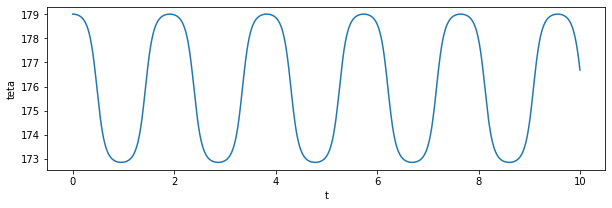

In [13]:
import numpy as np
import matplotlib.pyplot as plt

l = 0.1 #m
g = 9.8 #m/s
teta0 = 179 #graus em relação com a vertical
omega0 = 0 #largado do repouso

def f(r,t):
    teta = r[0]
    omega = r[1]
    
    fTeta = omega
    fOmega = - g/l * np.sin(teta)

    return np.array([fTeta , fOmega ], float)

t0 = 0
tf = 10
N = 1270
h = (tf - t0) / N

tPontos = np.arange(t0,tf,h)
tetaPontos = []
omegaPontos = []

r = np.array([teta0,omega0],float)
for t in tPontos:
    tetaPontos.append(r[0])
    omegaPontos.append(r[1])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5*k1, t+0.5*h)
    k3 = h * f(r + 0.5*k2, t+0.5*h)
    k4 = h * f(r + k3, t+h)
    r += (k1 + 2*k2 + 2*k3 + k4) /6 

plt.figure(figsize = (10,3))
plt.plot(tPontos,tetaPontos)
plt.xlabel("t")
plt.ylabel("teta")
plt.show()